## Overview

This project investigates whether the common assumption of normally distributed log returns holds for stocks or indexes. It involves testing for periods where log returns show evidence of normality and analyzing the impact of removing extreme values. I will attempt to Construct a portfolio with more normally distributed returns which can help assess the viability of this assumption in practice. Also, I'll analyze the return distribution of an existing portfolio over time which may reveal how stable or realistic the normality assumption is in real markets.

For the first portion I will be analyzing Costco;s return for the last two years

In [371]:
# Attempting Problem 1.
# We will take the ticker symbol COST for Costco and my low risk portfolio from mini project 1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import yfinance as yf
import datetime as dt
import warnings # for getting cleaner output
import pandas_market_calendars as mcal  # defines `mcal`
from scipy.stats import norm
from scipy.optimize import minimize

sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

In [372]:
#2 years of data
start_date = dt.datetime.today() - dt.timedelta(days = 2*365)
end_date = dt.datetime.today()

#costco stock data, isolate the logreturn data as a numpy array.
COST_stock = yf.download('COST', start = start_date, end = end_date)
COST_returns = COST_stock['Close']/COST_stock['Close'].shift(1)
COST_logreturns = np.log(COST_returns.dropna())['COST'].values

#My low risk portfolio, isolate the logreturn data as a numpy array.

[*********************100%***********************]  1 of 1 completed


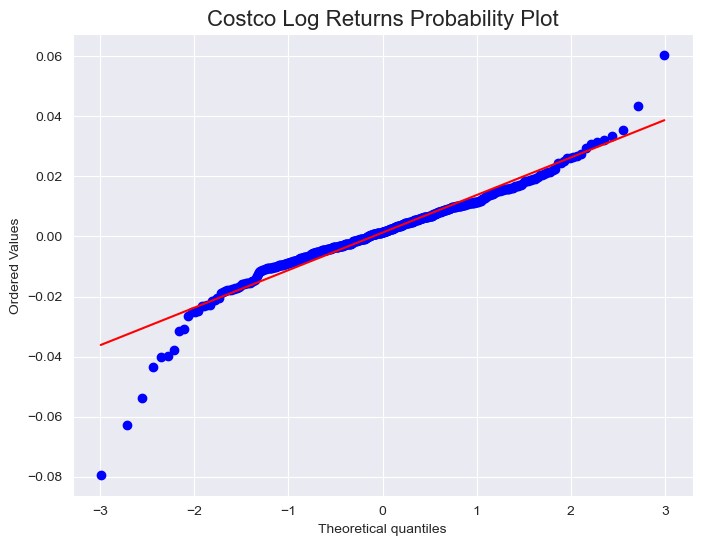

In [373]:
# Create a grid
fig, axis = plt.subplots(figsize=(8, 6))

# Plot COST log returns
stats.probplot(COST_logreturns, dist="norm", plot=axis)
axis.set_title("Costco Log Returns Probability Plot", fontsize=16)
axis.grid(True)


plt.show()

## Some Remarks:

1) After the next block where I'll check normality of Costco stcok, I'll look at 30-day, 60-day, and 90-day periods in the past 720 days the market was open to analyze if we had close to normal periods and how the length of the intervals affects this. 

2) I will be using Shapiro's, pearson's, and Kolmogorov's tests for to check whether the distribution of my data has evidence of being normal or not. Each test will return a statistics value and a p value. A low p-value means the data does't follow the normal distribution while A high p-value means the data does not contradict the normal distribution. Note that these are tests and depending on the size of the data set and some other factors might not be very accurate so I will be daring a histogram and Q-Q plot for each period.

3) Q-Q plots in simple terms plots the quantiles of the data on the y-axis against the quantiles of the normal distribution on the x-axis.the data follows the normal distribution, the points should lie approximately on a straight diagonal line.

In [375]:
#Collect p-values of normality tests
p_cost=stats.normaltest(COST_logreturns)[1]
pearson_p_cost = stats.normaltest(COST_logreturns)[1]
shapiro_p_cost = stats.shapiro(COST_logreturns)[1]
kolmogorov_p_cost = stats.kstest(COST_logreturns, 'norm', args=(COST_logreturns.mean(), COST_logreturns.std()))[1]


#Print evidence/non-evidence of normality
print(f"Costco log return distribution: D'Agostino and Pearson’s test p-value = {pearson_p_cost:.25f}")
if pearson_p_cost < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")
        
print(f"Costco log return distribution: Shapiro-Wilk’s test p-value = {shapiro_p_cost:.25f}")
if shapiro_p_cost < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")
        
print(f"Costco log return distribution: Kolmogorov-Smirnov’s test p-value = {kolmogorov_p_cost:.25f}")
if kolmogorov_p_cost < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")
    
    
    
print('--'*40) 
print('--'*40) 


print('So far we have looked at the whole two years and as expected the stock of costco is not normally distributed')


Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0000000000000000000000005
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0000000000001081802358739
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.0126705209017685463401826
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
So far we have looked at the whole two years and as expected the stock of costco is not normally distributed


In [376]:
# I'd like to look at 30-day, 60-day, and 90-day periods and to simplify the analysis the following function finds the earliest date such that there are exactly 720 days(almost 2 yrs) between then and today that the market was open.
def find_earliest_trading_window_ending_today(required_days=720, calendar_name='NYSE', start_search='2010-01-01'):
    """
    Finds the earliest start_date such that the period ending on today has exactly
    `required_days` trading days.
    
    Args:
        required_days (int): Number of trading days in the window.
        calendar_name (str): Market calendar name (e.g., 'NYSE').
        start_search (str): How far back to search for valid trading days.
    
    Returns:
        tuple: (start_date, end_date) as pd.Timestamp objects, or None if not found.
    """
    today = pd.Timestamp(dt.datetime.today().date())
    cal = mcal.get_calendar(calendar_name)
    schedule = cal.schedule(start_date=start_search, end_date=today)
    trading_days = schedule.index

    if len(trading_days) < required_days:
        return None  # Not enough trading days yet

    # Find the earliest start date such that [start_date, today] has exactly `required_days` trading days
    end_index = len(trading_days) - 1  # today
    start_index = end_index - required_days + 1

    if start_index >= 0:
        return (trading_days[start_index], trading_days[end_index])
    else:
        return None
my_start_date = find_earliest_trading_window_ending_today(required_days=720, calendar_name='NYSE', start_search='2010-01-01')

[*********************100%***********************]  1 of 1 completed


Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.1274 for period 1
2022-08-19 00:00:00 2022-09-30 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.2731 for period 1
2022-08-19 00:00:00 2022-09-30 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.7211 for period 1
2022-08-19 00:00:00 2022-09-30 00:00:00
→ No statistically significant evidence against normality.


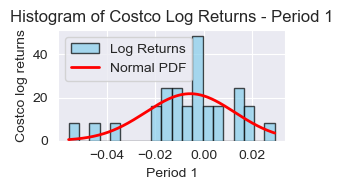

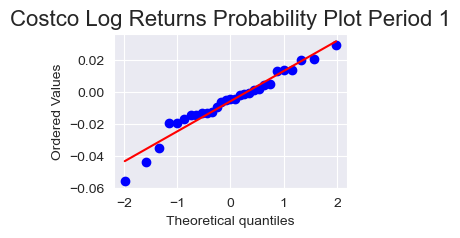

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.7970 for period 2
2022-10-03 00:00:00 2022-11-11 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.7016 for period 2
2022-10-03 00:00:00 2022-11-11 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.7055 for period 2
2022-10-03 00:00:00 2022-11-11 00:00:00
→ No statistically significant evidence against normality.


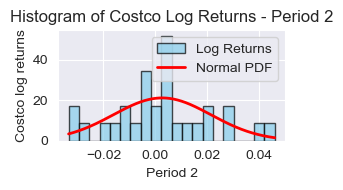

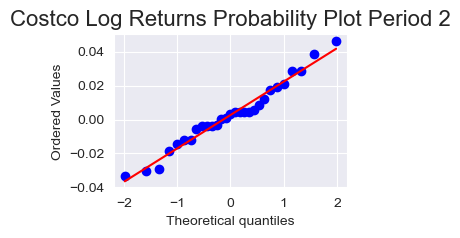

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0000 for period 3
2022-11-14 00:00:00 2022-12-27 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0006 for period 3
2022-11-14 00:00:00 2022-12-27 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.1928 for period 3
2022-11-14 00:00:00 2022-12-27 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.000

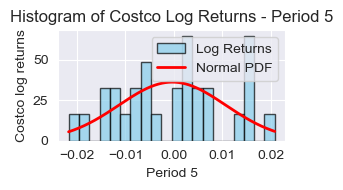

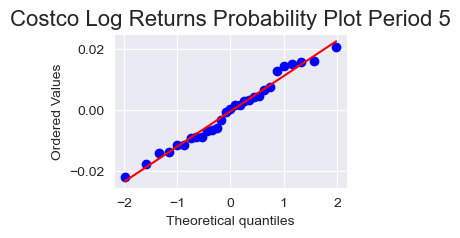

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.3173 for period 6
2023-03-27 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0990 for period 6
2023-03-27 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.4856 for period 6
2023-03-27 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.


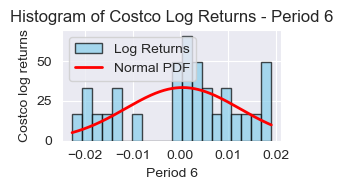

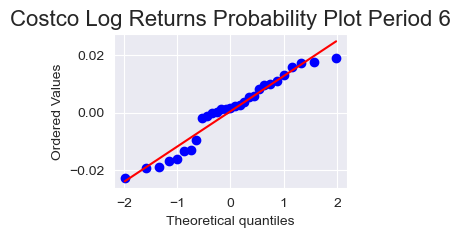

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0000 for period 7
2023-05-09 00:00:00 2023-06-21 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0013 for period 7
2023-05-09 00:00:00 2023-06-21 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.6581 for period 7
2023-05-09 00:00:00 2023-06-21 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.045

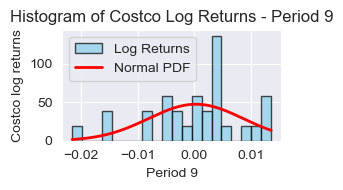

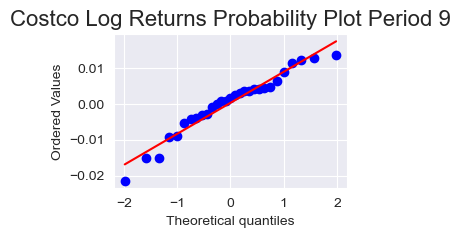

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.6374 for period 10
2023-09-18 00:00:00 2023-10-27 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.7717 for period 10
2023-09-18 00:00:00 2023-10-27 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9133 for period 10
2023-09-18 00:00:00 2023-10-27 00:00:00
→ No statistically significant evidence against normality.


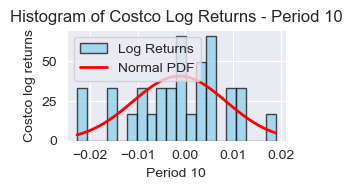

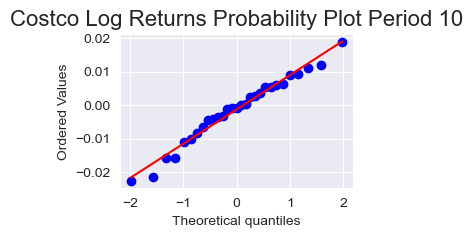

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0046 for period 11
2023-10-30 00:00:00 2023-12-11 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0267 for period 11
2023-10-30 00:00:00 2023-12-11 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.6130 for period 11
2023-10-30 00:00:00 2023-12-11 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.

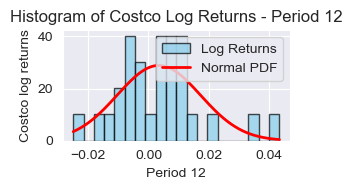

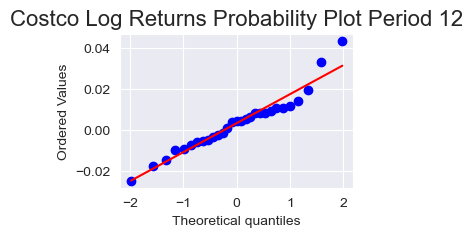

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0000 for period 13
2024-01-26 00:00:00 2024-03-08 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0000 for period 13
2024-01-26 00:00:00 2024-03-08 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.0431 for period 13
2024-01-26 00:00:00 2024-03-08 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearso

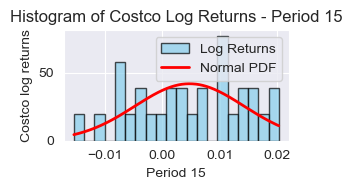

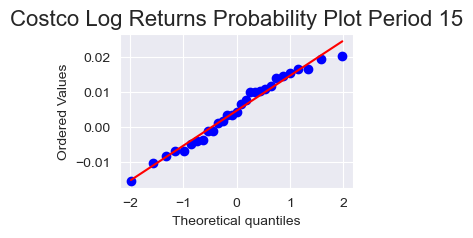

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0001 for period 16
2024-06-05 00:00:00 2024-07-18 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0042 for period 16
2024-06-05 00:00:00 2024-07-18 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.5342 for period 16
2024-06-05 00:00:00 2024-07-18 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.

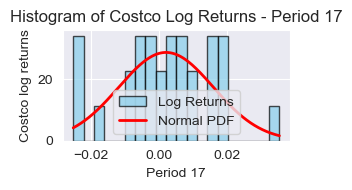

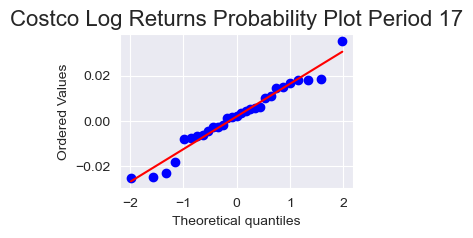

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.2405 for period 18
2024-08-30 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.2208 for period 18
2024-08-30 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.8945 for period 18
2024-08-30 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.


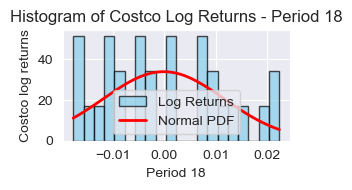

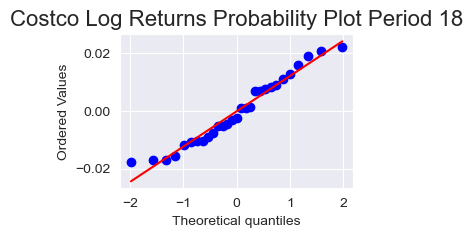

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0893 for period 19
2024-10-14 00:00:00 2024-11-22 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.2350 for period 19
2024-10-14 00:00:00 2024-11-22 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9440 for period 19
2024-10-14 00:00:00 2024-11-22 00:00:00
→ No statistically significant evidence against normality.


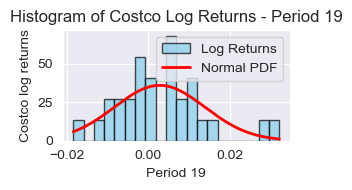

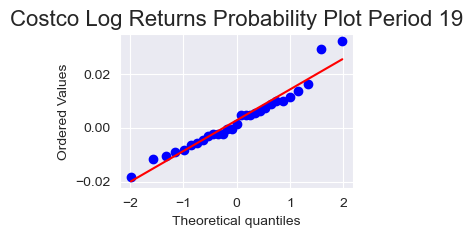

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.2725 for period 20
2024-11-25 00:00:00 2025-01-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0989 for period 20
2024-11-25 00:00:00 2025-01-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.7218 for period 20
2024-11-25 00:00:00 2025-01-08 00:00:00
→ No statistically significant evidence against normality.


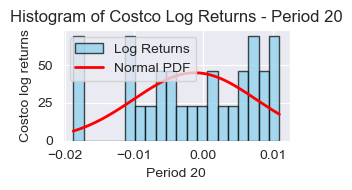

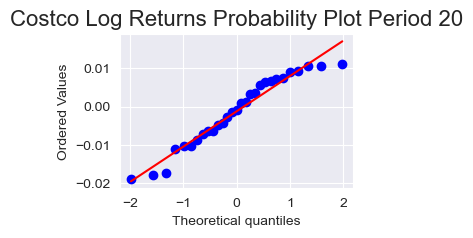

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.9718 for period 21
2025-01-10 00:00:00 2025-02-24 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.5946 for period 21
2025-01-10 00:00:00 2025-02-24 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.8982 for period 21
2025-01-10 00:00:00 2025-02-24 00:00:00
→ No statistically significant evidence against normality.


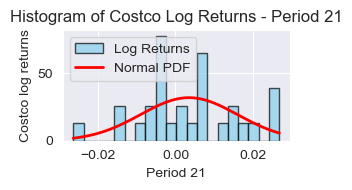

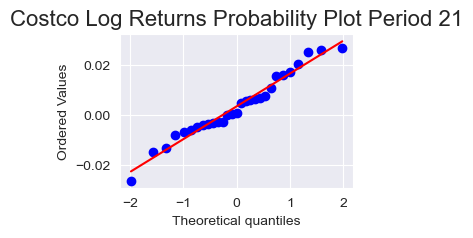

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0267 for period 22
2025-02-25 00:00:00 2025-04-07 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0229 for period 22
2025-02-25 00:00:00 2025-04-07 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.3427 for period 22
2025-02-25 00:00:00 2025-04-07 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.

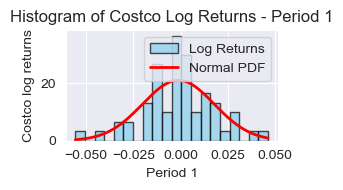

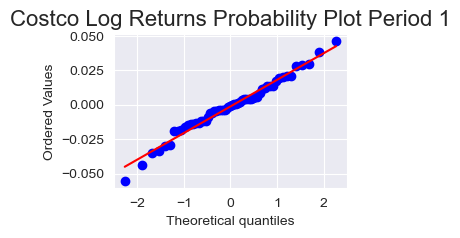

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0004 for period 2
2022-11-14 00:00:00 2023-02-09 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0001 for period 2
2022-11-14 00:00:00 2023-02-09 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.4057 for period 2
2022-11-14 00:00:00 2023-02-09 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.1154 for period 3
2023-02-10 00:00:00 2023-05-08 00:00:00
→ Statistically significant evidence that the data is NOT normall

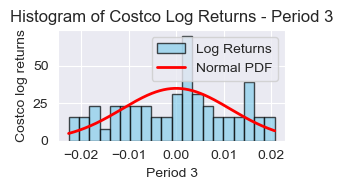

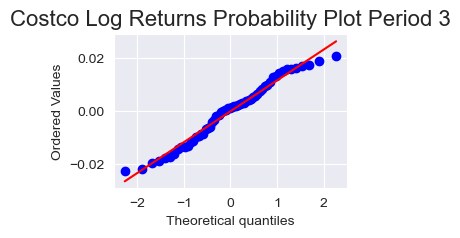

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0000 for period 4
2023-05-09 00:00:00 2023-08-03 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0033 for period 4
2023-05-09 00:00:00 2023-08-03 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.6669 for period 4
2023-05-09 00:00:00 2023-08-03 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.2050 for period 5
2023-08-04 00:00:00 2023-10-27 00:00:00
→ Statistically significant evidence that the data is NOT normall

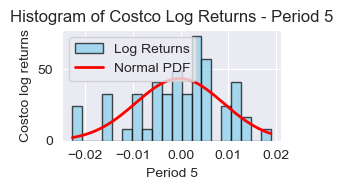

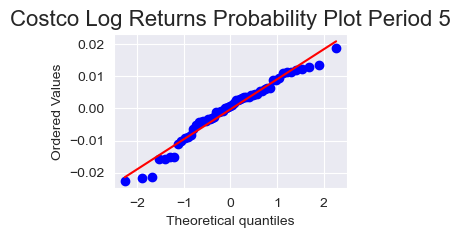

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0440 for period 6
2023-10-30 00:00:00 2024-01-25 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0330 for period 6
2023-10-30 00:00:00 2024-01-25 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.2993 for period 6
2023-10-30 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0000 for period 7
2024-01-26 00:00:00 2024-04-22 00:00:00
→ Statistically significant evidence that the data is NOT normall

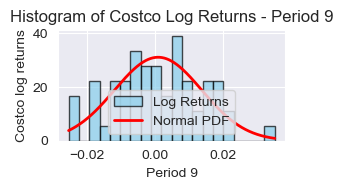

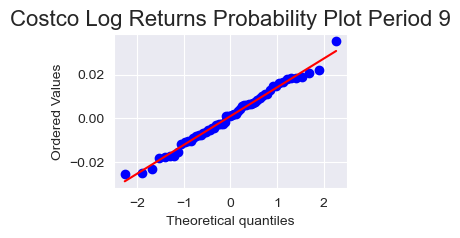

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0793 for period 10
2024-10-14 00:00:00 2025-01-08 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0741 for period 10
2024-10-14 00:00:00 2025-01-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.8509 for period 10
2024-10-14 00:00:00 2025-01-08 00:00:00
→ No statistically significant evidence against normality.


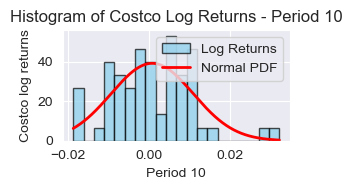

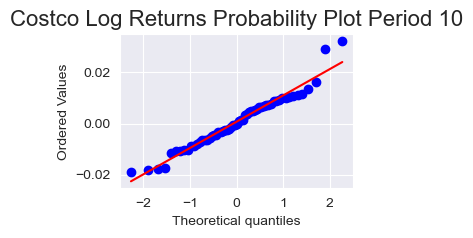

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0001 for period 11
2025-01-10 00:00:00 2025-04-07 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0009 for period 11
2025-01-10 00:00:00 2025-04-07 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.2579 for period 11
2025-01-10 00:00:00 2025-04-07 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0002 for period 12
2025-04-08 00:00:00 2025-07-03 00:00:00
→ Statistically significant evidence that the data is NOT nor

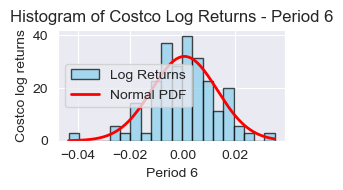

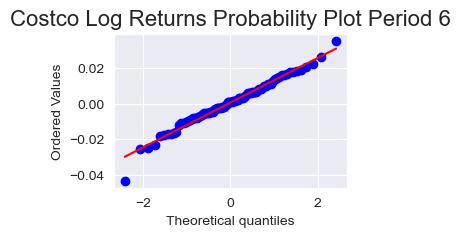

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.2563 for period 7
2024-10-14 00:00:00 2025-02-24 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.2941 for period 7
2024-10-14 00:00:00 2025-02-24 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.7960 for period 7
2024-10-14 00:00:00 2025-02-24 00:00:00
→ No statistically significant evidence against normality.


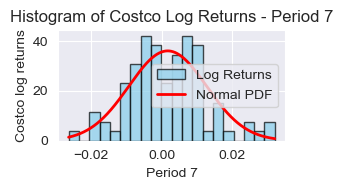

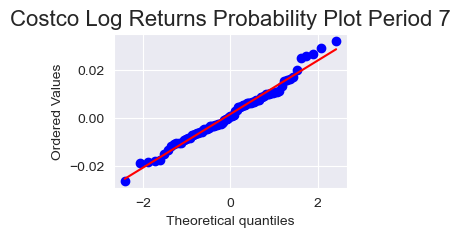

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0003 for period 8
2025-02-25 00:00:00 2025-07-03 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0001 for period 8
2025-02-25 00:00:00 2025-07-03 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.0554 for period 8
2025-02-25 00:00:00 2025-07-03 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************
there are 2 periods that are close to normal based on our normality tests.


In [377]:
# This function splits our dataframe into multiple dataframes with each having the specified number of days
def split_dataframe_by_days(df, chunk_size_days=30):
    n = len(df)
    max_full_chunks = n // chunk_size_days  # integer division
    
    chunks = [df.iloc[i*chunk_size_days:(i+1)*chunk_size_days] for i in range(max_full_chunks)]
    return chunks

COST_stock = yf.download('COST', start = my_start_date[0], end = dt.datetime.today(), auto_adjust = True)


num_normal_thirtyperiods = 0 #number of 30-day periods that are close to normally distributed 
num_normal_sixtyperiods = 0  #number of 60-day periods that are close to normally distributed
num_normal_ninetyperiods = 0 #number of 90-day periods that are close to normally distributed

splited_data_thirty = split_dataframe_by_days(COST_stock, chunk_size_days=30)
for i in range(len(splited_data_thirty)):
    
    COST_returns = splited_data_thirty[i]['Close']/splited_data_thirty[i]['Close'].shift(1)
    COST_logreturns = np.log(COST_returns.dropna())['COST'].values
    pearson_p_cost = stats.normaltest(COST_logreturns)[1]
    shapiro_p_cost = stats.shapiro(COST_logreturns)[1]
    kolmogorov_p_cost = stats.kstest(COST_logreturns, 'norm', args=(COST_logreturns.mean(), COST_logreturns.std()))[1]

    #Print evidence/non-evidence of normality
    print(f"Costco log return distribution: D'Agostino and Pearson’s test p-value = {pearson_p_cost:.4f} for period {i+1}")
    print(splited_data_thirty[i].index.min(),splited_data_thirty[i].index.max())
    if pearson_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
        
    print(f"Costco log return distribution: Shapiro-Wilk’s test p-value = {shapiro_p_cost:.4f} for period {i+1}")
    print(splited_data_thirty[i].index.min(),splited_data_thirty[i].index.max())
    if shapiro_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
        
    print(f"Costco log return distribution: Kolmogorov-Smirnov’s test p-value = {kolmogorov_p_cost:.4f} for period {i+1}")
    print(splited_data_thirty[i].index.min(),splited_data_thirty[i].index.max())
    if kolmogorov_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
    
    
    if pearson_p_cost >= 0.05 and shapiro_p_cost >= 0.05 and kolmogorov_p_cost >= 0.05:
        num_normal_thirtyperiods += 1
        # Assume COST_logreturns is a list or 1D array of log returns
        mean = np.mean(COST_logreturns)
        std = np.std(COST_logreturns)

        # Create histogram
        plt.figure(figsize=(3, 2))  # small size

        count, bins, ignored = plt.hist(COST_logreturns, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Log Returns')

        # Plot normal distribution curve
        x = np.linspace(min(COST_logreturns), max(COST_logreturns), 1000)
        plt.plot(x, norm.pdf(x, mean, std), 'r-', lw=2, label='Normal PDF')

        # Labels and title
        plt.xlabel('Period '+ str(i+1))
        plt.ylabel('Costco log returns')
        plt.title('Histogram of Costco Log Returns - Period '+ str(i+1))
        plt.legend()

        plt.tight_layout()
        plt.show()
        
        # Create a grid
        fig, axis = plt.subplots(figsize=(3, 2))

        # Plot COST log returns
        stats.probplot(COST_logreturns, dist="norm", plot=axis)
        axis.set_title("Costco Log Returns Probability Plot Period "+ str(i+1), fontsize=16)
        axis.grid(True)


        plt.show()
        
    else:
        None
        
    
    print('****************'*10)
print('there are ' + str(num_normal_thirtyperiods)+ ' periods that are close to normal based on our normality tests.')
        
print('---------'*10)




splited_data_sixty = split_dataframe_by_days(COST_stock, chunk_size_days=60)
for i in range(len(splited_data_sixty)):
   
    COST_returns = splited_data_sixty[i]['Close']/splited_data_sixty[i]['Close'].shift(1)
    COST_logreturns = np.log(COST_returns.dropna())['COST'].values
    pearson_p_cost=stats.normaltest(COST_logreturns)[1]
    shapiro_p_cost = stats.shapiro(COST_logreturns)[1]
    kolmogorov_p_cost = stats.kstest(COST_logreturns, 'norm', args=(COST_logreturns.mean(), COST_logreturns.std()))[1]

    #Print evidence/non-evidence of normality
    print(f"Costco log return distribution: D'Agostino and Pearson’s test p-value = {pearson_p_cost:.4f} for period {i+1}")
    print(splited_data_sixty[i].index.min(),splited_data_sixty[i].index.max())
    if p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
    print(f"Costco log return distribution: Shapiro-Wilk’s test p-value = {shapiro_p_cost:.4f} for period {i+1}")
    print(splited_data_sixty[i].index.min(),splited_data_sixty[i].index.max())
    if shapiro_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
        
    print(f"Costco log return distribution: Kolmogorov-Smirnov’s test p-value = {kolmogorov_p_cost:.4f} for period {i+1}")
    print(splited_data_sixty[i].index.min(),splited_data_sixty[i].index.max())
    if kolmogorov_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
    
    if pearson_p_cost >= 0.05 and shapiro_p_cost >= 0.05 and kolmogorov_p_cost >= 0.05:
        num_normal_sixtyperiods += 1
        # Assume COST_logreturns is a list or 1D array of log returns
        mean = np.mean(COST_logreturns)
        std = np.std(COST_logreturns)

        # Create histogram
        plt.figure(figsize=(3, 2))  # small size

        count, bins, ignored = plt.hist(COST_logreturns, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Log Returns')

        # Plot normal distribution curve
        x = np.linspace(min(COST_logreturns), max(COST_logreturns), 1000)
        plt.plot(x, norm.pdf(x, mean, std), 'r-', lw=2, label='Normal PDF')

        # Labels and title
        plt.xlabel('Period '+ str(i+1))
        plt.ylabel('Costco log returns')
        plt.title('Histogram of Costco Log Returns - Period '+ str(i+1))
        plt.legend()

        plt.tight_layout()
        plt.show()
        
        # Create a grid
        fig, axis = plt.subplots(figsize=(3, 2))

        # Plot COST log returns
        stats.probplot(COST_logreturns, dist="norm", plot=axis)
        axis.set_title("Costco Log Returns Probability Plot Period "+ str(i+1), fontsize=16)
        axis.grid(True)


        plt.show()
    else:
        None
        
    print('**********'*10) 
print('there are ' + str(num_normal_sixtyperiods)+ ' periods that are close to normal based on our normality tests.')

print('---------'*10)





splited_data_ninety = split_dataframe_by_days(COST_stock, chunk_size_days=90)
for i in range(len(splited_data_ninety)):
    COST_returns = splited_data_ninety[i]['Close']/splited_data_ninety[i]['Close'].shift(1)
    COST_logreturns = np.log(COST_returns.dropna())['COST'].values
    pearson_p_cost=stats.normaltest(COST_logreturns)[1]
    shapiro_p_cost = stats.shapiro(COST_logreturns)[1]
    kolmogorov_p_cost = stats.kstest(COST_logreturns, 'norm', args=(COST_logreturns.mean(), COST_logreturns.std()))[1]


    #Print evidence/non-evidence of normality
    print(f"Costco log return distribution: D'Agostino and Pearson’s test p-value = {pearson_p_cost:.4f} for period {i+1}")
    print(splited_data_ninety[i].index.min(),splited_data_ninety[i].index.max())
    if p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
    print(f"Costco log return distribution: Shapiro-Wilk’s test p-value = {shapiro_p_cost:.4f} for period {i+1}")
    print(splited_data_ninety[i].index.min(),splited_data_ninety[i].index.max())
    if shapiro_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
        
    print(f"Costco log return distribution: Kolmogorov-Smirnov’s test p-value = {kolmogorov_p_cost:.4f} for period {i+1}")
    print(splited_data_ninety[i].index.min(),splited_data_ninety[i].index.max())
    if kolmogorov_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
    
    if pearson_p_cost >= 0.05 and shapiro_p_cost >= 0.05 and kolmogorov_p_cost >= 0.05:
        num_normal_ninetyperiods +=1
        # Assume COST_logreturns is a list or 1D array of log returns
        mean = np.mean(COST_logreturns)
        std = np.std(COST_logreturns)

        # Create histogram
        plt.figure(figsize=(3, 2))  # small size

        count, bins, ignored = plt.hist(COST_logreturns, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Log Returns')

        # Plot normal distribution curve
        x = np.linspace(min(COST_logreturns), max(COST_logreturns), 1000)
        plt.plot(x, norm.pdf(x, mean, std), 'r-', lw=2, label='Normal PDF')

        # Labels and title
        plt.xlabel('Period '+ str(i+1))
        plt.ylabel('Costco log returns')
        plt.title('Histogram of Costco Log Returns - Period '+ str(i+1))
        plt.legend()

        plt.tight_layout()
        plt.show()
        
        # Create a grid
        fig, axis = plt.subplots(figsize=(3, 2))

        # Plot COST log returns
        stats.probplot(COST_logreturns, dist="norm", plot=axis)
        axis.set_title("Costco Log Returns Probability Plot Period "+ str(i+1), fontsize=16)
        axis.grid(True)


        plt.show()
    else:
        None
        
    print('**********'*10) 
print('there are ' + str(num_normal_ninetyperiods)+ ' periods that are close to normal based on our normality tests.')


[*********************100%***********************]  1 of 1 completed


Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.3736 for period 1
2022-08-19 00:00:00 2022-09-30 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.4279 for period 1
2022-08-19 00:00:00 2022-09-30 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9490 for period 1
2022-08-19 00:00:00 2022-09-30 00:00:00
→ No statistically significant evidence against normality.


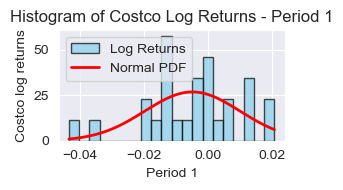

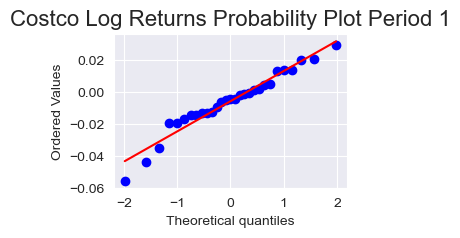

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.9048 for period 2
2022-10-03 00:00:00 2022-11-11 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.8087 for period 2
2022-10-03 00:00:00 2022-11-11 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.7675 for period 2
2022-10-03 00:00:00 2022-11-11 00:00:00
→ No statistically significant evidence against normality.


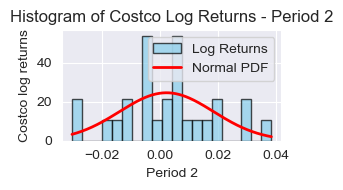

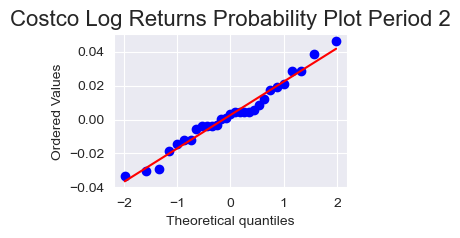

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0021 for period 3
2022-11-14 00:00:00 2022-12-27 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0420 for period 3
2022-11-14 00:00:00 2022-12-27 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.7627 for period 3
2022-11-14 00:00:00 2022-12-27 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.987

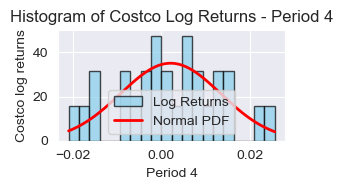

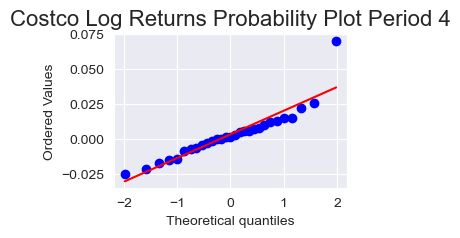

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.2774 for period 5
2023-02-10 00:00:00 2023-03-24 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.2583 for period 5
2023-02-10 00:00:00 2023-03-24 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.7810 for period 5
2023-02-10 00:00:00 2023-03-24 00:00:00
→ No statistically significant evidence against normality.


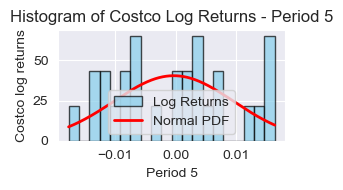

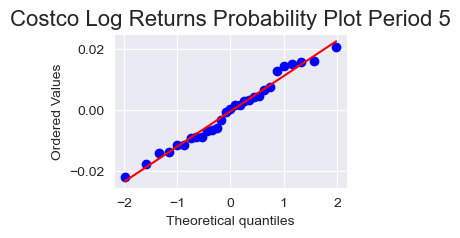

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.3854 for period 6
2023-03-27 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0824 for period 6
2023-03-27 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.4949 for period 6
2023-03-27 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.


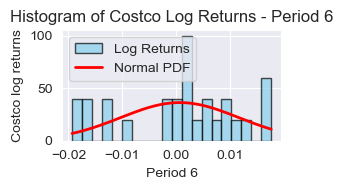

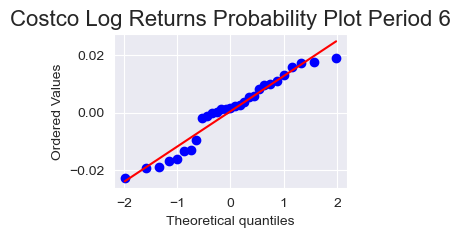

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.8329 for period 7
2023-05-09 00:00:00 2023-06-21 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.8659 for period 7
2023-05-09 00:00:00 2023-06-21 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9732 for period 7
2023-05-09 00:00:00 2023-06-21 00:00:00
→ No statistically significant evidence against normality.


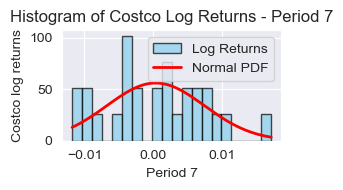

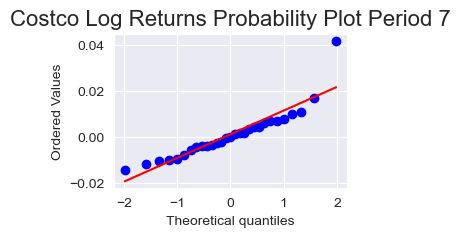

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.8378 for period 8
2023-06-22 00:00:00 2023-08-03 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.4918 for period 8
2023-06-22 00:00:00 2023-08-03 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.7665 for period 8
2023-06-22 00:00:00 2023-08-03 00:00:00
→ No statistically significant evidence against normality.


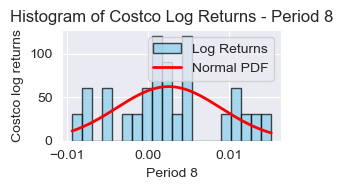

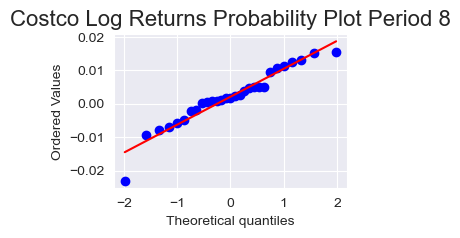

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.4975 for period 9
2023-08-04 00:00:00 2023-09-15 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.3395 for period 9
2023-08-04 00:00:00 2023-09-15 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.8945 for period 9
2023-08-04 00:00:00 2023-09-15 00:00:00
→ No statistically significant evidence against normality.


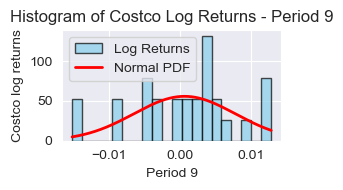

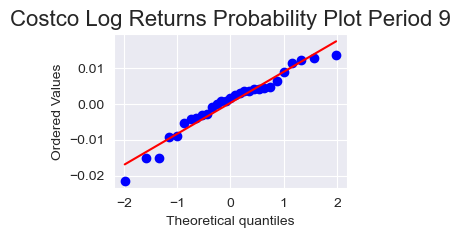

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.4336 for period 10
2023-09-18 00:00:00 2023-10-27 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.4670 for period 10
2023-09-18 00:00:00 2023-10-27 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9543 for period 10
2023-09-18 00:00:00 2023-10-27 00:00:00
→ No statistically significant evidence against normality.


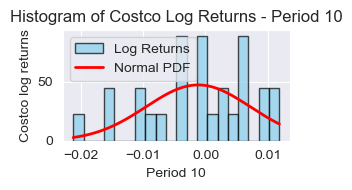

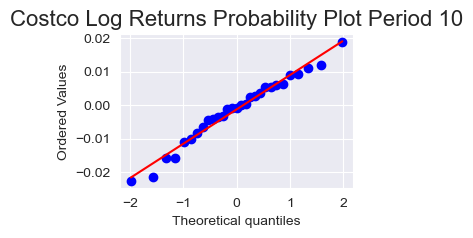

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.6234 for period 11
2023-10-30 00:00:00 2023-12-11 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.4774 for period 11
2023-10-30 00:00:00 2023-12-11 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.8545 for period 11
2023-10-30 00:00:00 2023-12-11 00:00:00
→ No statistically significant evidence against normality.


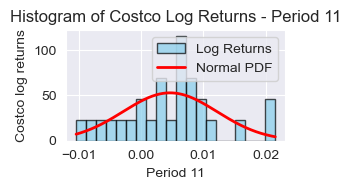

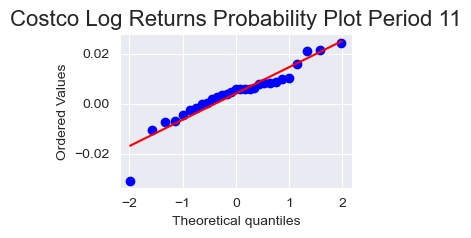

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.2375 for period 12
2023-12-12 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.5644 for period 12
2023-12-12 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9397 for period 12
2023-12-12 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.


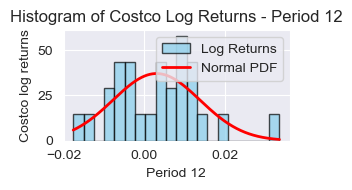

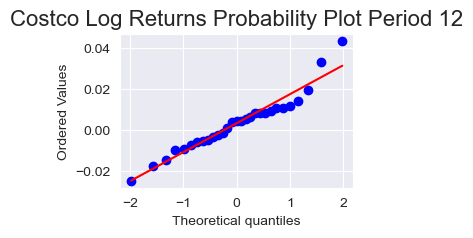

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.6955 for period 13
2024-01-26 00:00:00 2024-03-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.6454 for period 13
2024-01-26 00:00:00 2024-03-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9230 for period 13
2024-01-26 00:00:00 2024-03-08 00:00:00
→ No statistically significant evidence against normality.


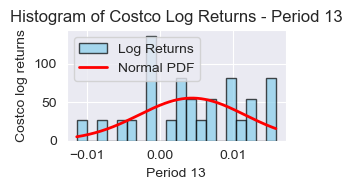

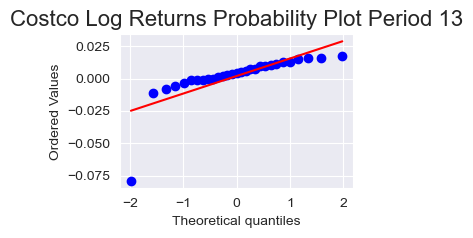

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.9469 for period 14
2024-03-11 00:00:00 2024-04-22 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.6118 for period 14
2024-03-11 00:00:00 2024-04-22 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9124 for period 14
2024-03-11 00:00:00 2024-04-22 00:00:00
→ No statistically significant evidence against normality.


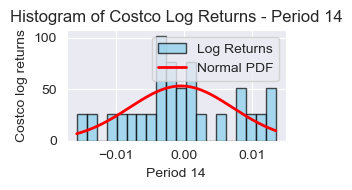

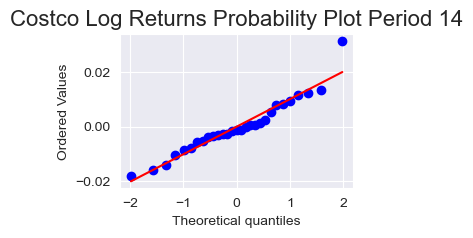

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.1055 for period 15
2024-04-23 00:00:00 2024-06-04 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.3168 for period 15
2024-04-23 00:00:00 2024-06-04 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.7009 for period 15
2024-04-23 00:00:00 2024-06-04 00:00:00
→ No statistically significant evidence against normality.


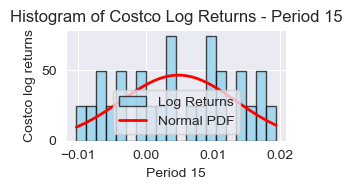

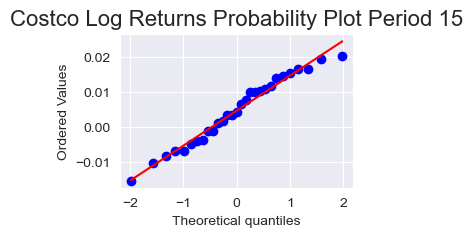

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.9787 for period 16
2024-06-05 00:00:00 2024-07-18 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.9937 for period 16
2024-06-05 00:00:00 2024-07-18 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9784 for period 16
2024-06-05 00:00:00 2024-07-18 00:00:00
→ No statistically significant evidence against normality.


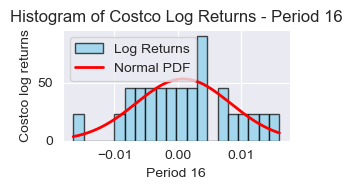

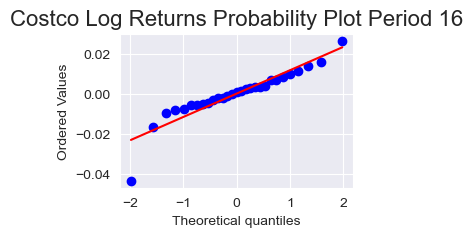

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.4540 for period 17
2024-07-19 00:00:00 2024-08-29 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.1837 for period 17
2024-07-19 00:00:00 2024-08-29 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9654 for period 17
2024-07-19 00:00:00 2024-08-29 00:00:00
→ No statistically significant evidence against normality.


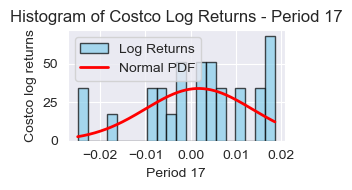

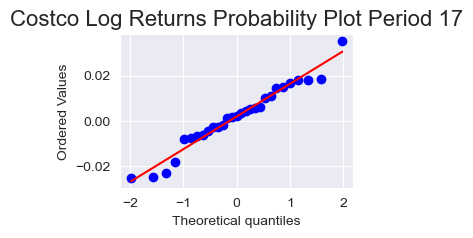

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.3094 for period 18
2024-08-30 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.3460 for period 18
2024-08-30 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.8342 for period 18
2024-08-30 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.


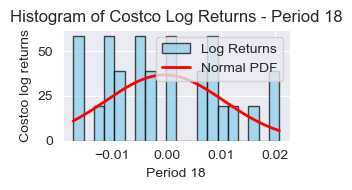

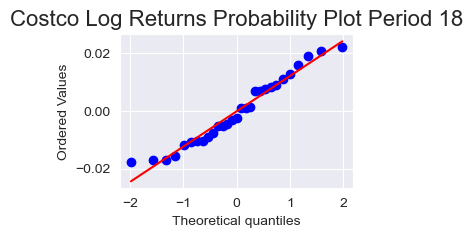

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0946 for period 19
2024-10-14 00:00:00 2024-11-22 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.2747 for period 19
2024-10-14 00:00:00 2024-11-22 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.8957 for period 19
2024-10-14 00:00:00 2024-11-22 00:00:00
→ No statistically significant evidence against normality.


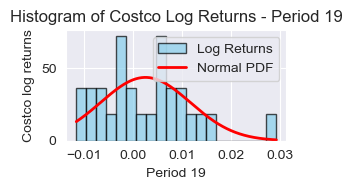

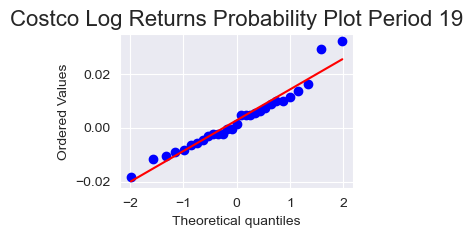

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.3609 for period 20
2024-11-25 00:00:00 2025-01-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.1864 for period 20
2024-11-25 00:00:00 2025-01-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.7650 for period 20
2024-11-25 00:00:00 2025-01-08 00:00:00
→ No statistically significant evidence against normality.


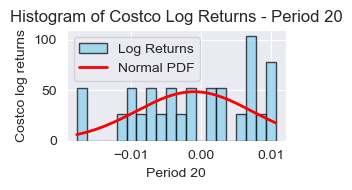

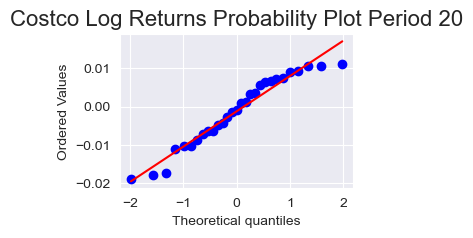

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.5213 for period 21
2025-01-10 00:00:00 2025-02-24 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.3639 for period 21
2025-01-10 00:00:00 2025-02-24 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.6959 for period 21
2025-01-10 00:00:00 2025-02-24 00:00:00
→ No statistically significant evidence against normality.


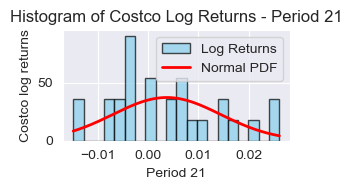

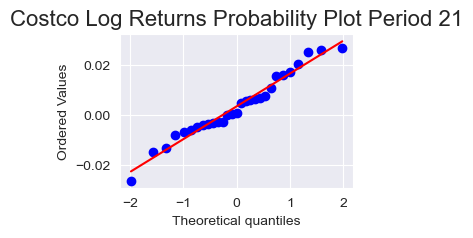

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0496 for period 22
2025-02-25 00:00:00 2025-04-07 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0343 for period 22
2025-02-25 00:00:00 2025-04-07 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.5205 for period 22
2025-02-25 00:00:00 2025-04-07 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.

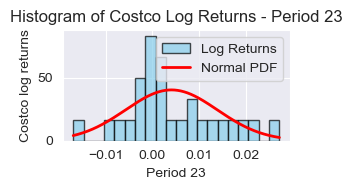

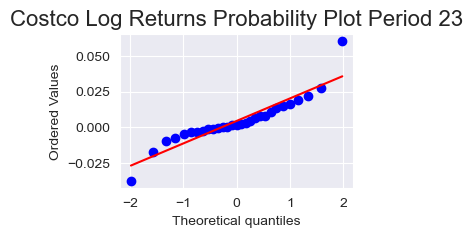

****************************************************************************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0159 for period 24
2025-05-21 00:00:00 2025-07-03 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0842 for period 24
2025-05-21 00:00:00 2025-07-03 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.4365 for period 24
2025-05-21 00:00:00 2025-07-03 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************************************************************************
there are 21 periods that are close to normal based on our normality tests.
-------------------

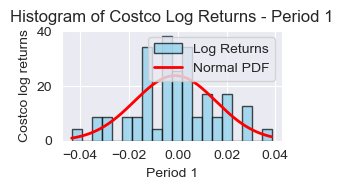

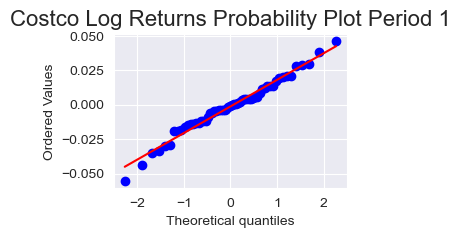

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.1540 for period 2
2022-11-14 00:00:00 2023-02-09 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.6904 for period 2
2022-11-14 00:00:00 2023-02-09 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9620 for period 2
2022-11-14 00:00:00 2023-02-09 00:00:00
→ No statistically significant evidence against normality.


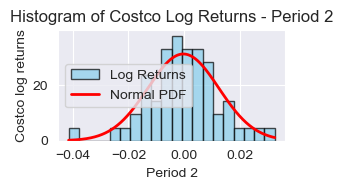

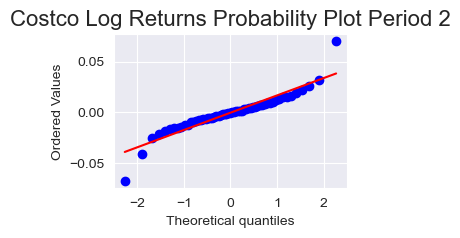

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.1046 for period 3
2023-02-10 00:00:00 2023-05-08 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.1321 for period 3
2023-02-10 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.8380 for period 3
2023-02-10 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.


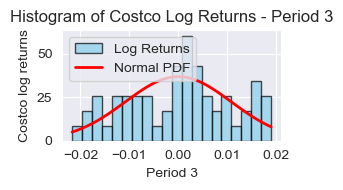

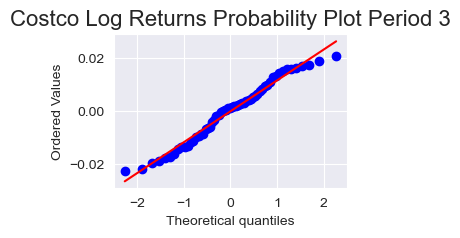

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.7272 for period 4
2023-05-09 00:00:00 2023-08-03 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.9010 for period 4
2023-05-09 00:00:00 2023-08-03 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9893 for period 4
2023-05-09 00:00:00 2023-08-03 00:00:00
→ No statistically significant evidence against normality.


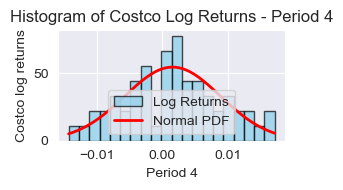

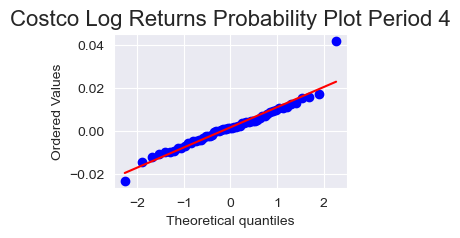

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.1563 for period 5
2023-08-04 00:00:00 2023-10-27 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0510 for period 5
2023-08-04 00:00:00 2023-10-27 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.7582 for period 5
2023-08-04 00:00:00 2023-10-27 00:00:00
→ No statistically significant evidence against normality.


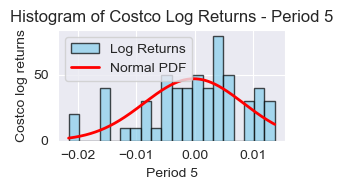

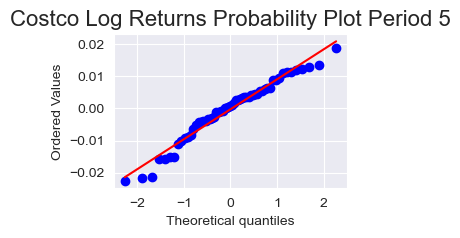

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.2856 for period 6
2023-10-30 00:00:00 2024-01-25 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.4208 for period 6
2023-10-30 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.6194 for period 6
2023-10-30 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.


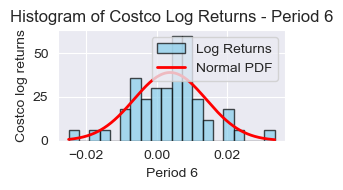

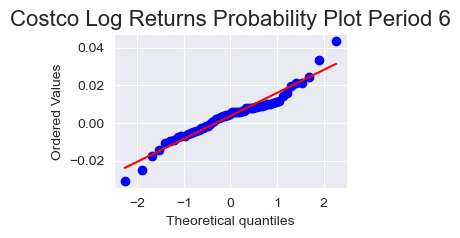

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.5888 for period 7
2024-01-26 00:00:00 2024-04-22 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.3685 for period 7
2024-01-26 00:00:00 2024-04-22 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9450 for period 7
2024-01-26 00:00:00 2024-04-22 00:00:00
→ No statistically significant evidence against normality.


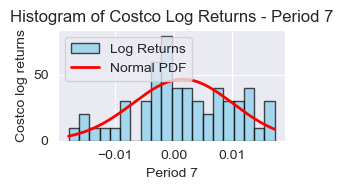

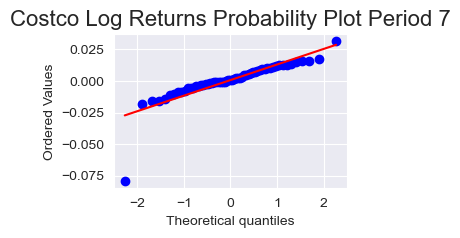

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.4499 for period 8
2024-04-23 00:00:00 2024-07-18 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.6270 for period 8
2024-04-23 00:00:00 2024-07-18 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9343 for period 8
2024-04-23 00:00:00 2024-07-18 00:00:00
→ No statistically significant evidence against normality.


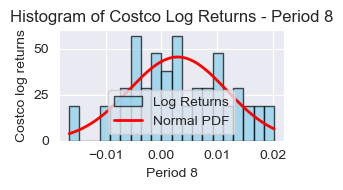

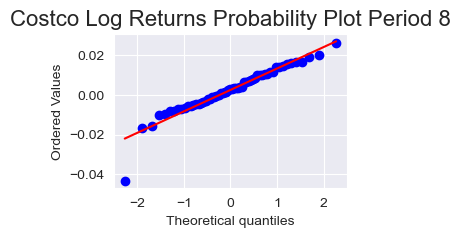

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.3493 for period 9
2024-07-19 00:00:00 2024-10-11 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.4660 for period 9
2024-07-19 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9870 for period 9
2024-07-19 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.


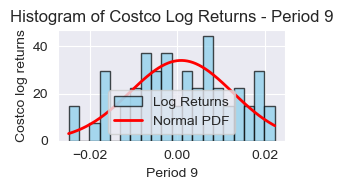

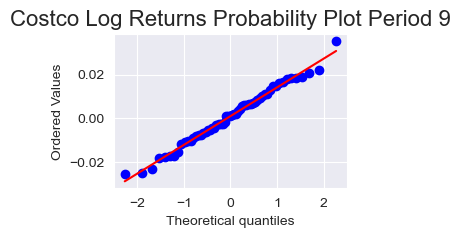

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.4669 for period 10
2024-10-14 00:00:00 2025-01-08 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.3307 for period 10
2024-10-14 00:00:00 2025-01-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.8602 for period 10
2024-10-14 00:00:00 2025-01-08 00:00:00
→ No statistically significant evidence against normality.


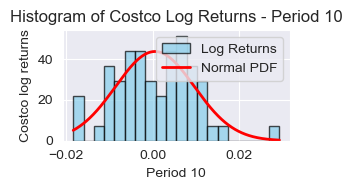

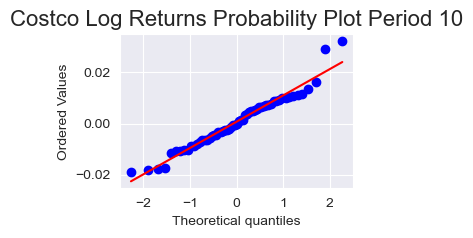

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0033 for period 11
2025-01-10 00:00:00 2025-04-07 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0179 for period 11
2025-01-10 00:00:00 2025-04-07 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.5304 for period 11
2025-01-10 00:00:00 2025-04-07 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0795 for period 12
2025-04-08 00:00:00 2025-07-03 00:00:00
→ Statistically significant evidence that the data is NOT nor

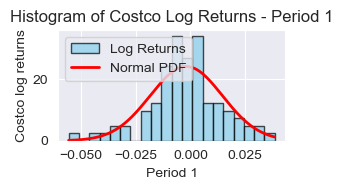

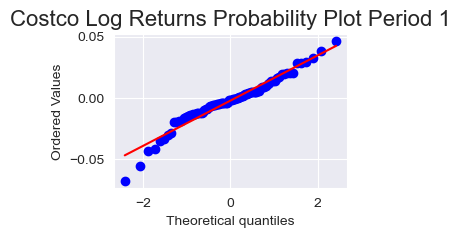

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.2180 for period 2
2022-12-28 00:00:00 2023-05-08 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.2981 for period 2
2022-12-28 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.8292 for period 2
2022-12-28 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.


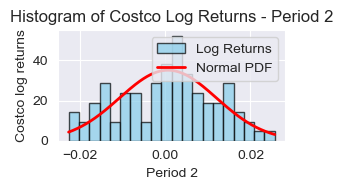

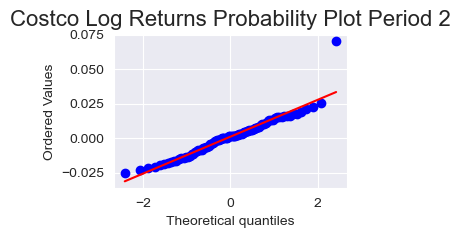

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.5305 for period 3
2023-05-09 00:00:00 2023-09-15 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.6000 for period 3
2023-05-09 00:00:00 2023-09-15 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.7285 for period 3
2023-05-09 00:00:00 2023-09-15 00:00:00
→ No statistically significant evidence against normality.


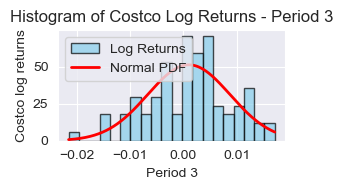

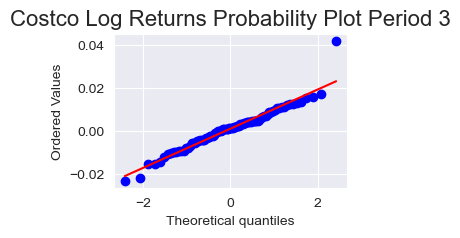

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.4386 for period 4
2023-09-18 00:00:00 2024-01-25 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.3959 for period 4
2023-09-18 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.6450 for period 4
2023-09-18 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.


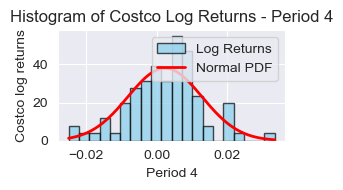

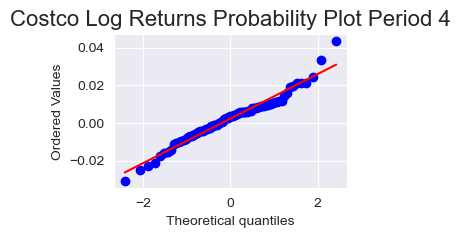

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.2299 for period 5
2024-01-26 00:00:00 2024-06-04 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.2374 for period 5
2024-01-26 00:00:00 2024-06-04 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.5489 for period 5
2024-01-26 00:00:00 2024-06-04 00:00:00
→ No statistically significant evidence against normality.


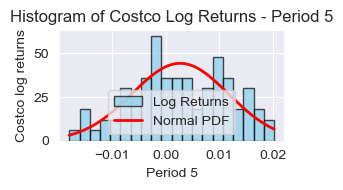

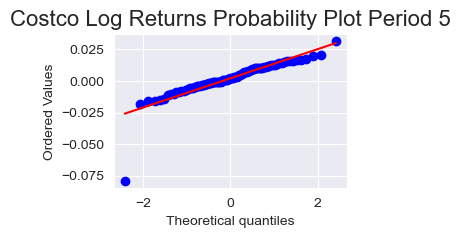

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.8719 for period 6
2024-06-05 00:00:00 2024-10-11 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.8147 for period 6
2024-06-05 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.9997 for period 6
2024-06-05 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.


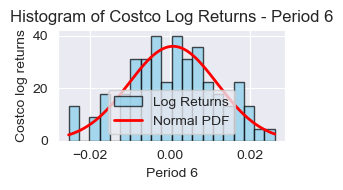

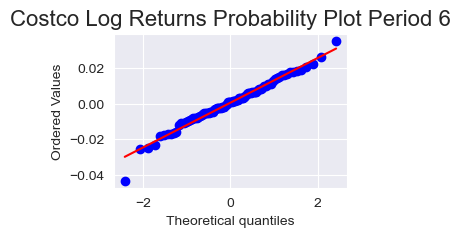

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.3043 for period 7
2024-10-14 00:00:00 2025-02-24 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.1962 for period 7
2024-10-14 00:00:00 2025-02-24 00:00:00
→ No statistically significant evidence against normality.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.6903 for period 7
2024-10-14 00:00:00 2025-02-24 00:00:00
→ No statistically significant evidence against normality.


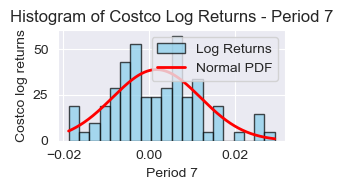

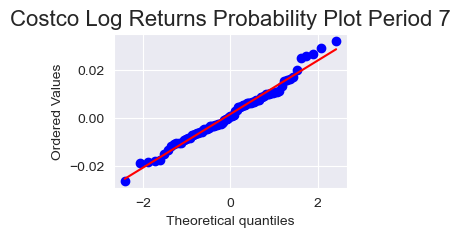

****************************************************************************************************
Costco log return distribution: D'Agostino and Pearson’s test p-value = 0.0003 for period 8
2025-02-25 00:00:00 2025-07-03 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Shapiro-Wilk’s test p-value = 0.0010 for period 8
2025-02-25 00:00:00 2025-07-03 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
Costco log return distribution: Kolmogorov-Smirnov’s test p-value = 0.1771 for period 8
2025-02-25 00:00:00 2025-07-03 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************
there are 7 periods that are close to normal based on our normality tests.


In [378]:
#Attempting problem 2
#the function below remove top and bottom 1% etremal data by default and can be adjusted.
def remove_extremes_percentile(data, lower=1, upper=99):
    low = np.percentile(data, lower)
    high = np.percentile(data, upper)
    filtered = data[(data >= low) & (data <= high)]
    return filtered

COST_stock = yf.download('COST', start = my_start_date[0], end = dt.datetime.today(), auto_adjust = True)


ext_normal_thirtyperiods = 0 #number of 30-day periods that are close to normally distributed after removing extremals
ext_normal_sixtyperiods = 0  #number of 60-day periods that are close to normally distributed after removing extremals
ext_normal_ninetyperiods = 0 #number of 90-day periods that are close to normally distributed after removing extremals

splited_data_thirty = split_dataframe_by_days(COST_stock, chunk_size_days=30)
for i in range(len(splited_data_thirty)):
    
    COST_returns = splited_data_thirty[i]['Close']/splited_data_thirty[i]['Close'].shift(1)
    COST_logreturns = np.log(COST_returns.dropna())['COST'].values
    filtered_COST_logreturns = remove_extremes_percentile(COST_logreturns, lower=1, upper=99)
    pearson_p_cost = stats.normaltest(filtered_COST_logreturns)[1]
    shapiro_p_cost = stats.shapiro(filtered_COST_logreturns)[1]
    kolmogorov_p_cost = stats.kstest(filtered_COST_logreturns, 'norm', args=(filtered_COST_logreturns.mean(), filtered_COST_logreturns.std()))[1]

    #Print evidence/non-evidence of normality
    print(f"Costco log return distribution: D'Agostino and Pearson’s test p-value = {pearson_p_cost:.4f} for period {i+1}")
    print(splited_data_thirty[i].index.min(),splited_data_thirty[i].index.max())
    if pearson_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
        
    print(f"Costco log return distribution: Shapiro-Wilk’s test p-value = {shapiro_p_cost:.4f} for period {i+1}")
    print(splited_data_thirty[i].index.min(),splited_data_thirty[i].index.max())
    if shapiro_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
        
    print(f"Costco log return distribution: Kolmogorov-Smirnov’s test p-value = {kolmogorov_p_cost:.4f} for period {i+1}")
    print(splited_data_thirty[i].index.min(),splited_data_thirty[i].index.max())
    if kolmogorov_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
    
    
    if pearson_p_cost >= 0.05 and shapiro_p_cost >= 0.05 and kolmogorov_p_cost >= 0.05:
        ext_normal_thirtyperiods += 1
        # Assume COST_logreturns is a list or 1D array of log returns
        mean = np.mean(filtered_COST_logreturns)
        std = np.std(filtered_COST_logreturns)

        # Create histogram
        plt.figure(figsize=(3, 2))  # small size

        count, bins, ignored = plt.hist(filtered_COST_logreturns, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Log Returns')

        # Plot normal distribution curve
        x = np.linspace(min(filtered_COST_logreturns), max(filtered_COST_logreturns), 1000)
        plt.plot(x, norm.pdf(x, mean, std), 'r-', lw=2, label='Normal PDF')

        # Labels and title
        plt.xlabel('Period '+ str(i+1))
        plt.ylabel('Costco log returns')
        plt.title('Histogram of Costco Log Returns - Period '+ str(i+1))
        plt.legend()

        plt.tight_layout()
        plt.show()
        
        # Create a grid
        fig, axis = plt.subplots(figsize=(3, 2))

        # Plot COST log returns
        stats.probplot(COST_logreturns, dist="norm", plot=axis)
        axis.set_title("Costco Log Returns Probability Plot Period "+ str(i+1), fontsize=16)
        axis.grid(True)


        plt.show()
    else:
        None
        
    
    print('****************'*10)
print('there are ' + str(ext_normal_thirtyperiods)+ ' periods that are close to normal based on our normality tests.')
        
print('---------'*10)




splited_data_sixty = split_dataframe_by_days(COST_stock, chunk_size_days=60)
for i in range(len(splited_data_sixty)):
   
    COST_returns = splited_data_sixty[i]['Close']/splited_data_sixty[i]['Close'].shift(1)
    COST_logreturns = np.log(COST_returns.dropna())['COST'].values
    filtered_COST_logreturns = remove_extremes_percentile(COST_logreturns, lower=1, upper=99)
    pearson_p_cost=stats.normaltest(filtered_COST_logreturns)[1]
    shapiro_p_cost = stats.shapiro(filtered_COST_logreturns)[1]
    kolmogorov_p_cost = stats.kstest(filtered_COST_logreturns, 'norm', args=(filtered_COST_logreturns.mean(), filtered_COST_logreturns.std()))[1]

    #Print evidence/non-evidence of normality
    print(f"Costco log return distribution: D'Agostino and Pearson’s test p-value = {pearson_p_cost:.4f} for period {i+1}")
    print(splited_data_sixty[i].index.min(),splited_data_sixty[i].index.max())
    if p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
    print(f"Costco log return distribution: Shapiro-Wilk’s test p-value = {shapiro_p_cost:.4f} for period {i+1}")
    print(splited_data_sixty[i].index.min(),splited_data_sixty[i].index.max())
    if shapiro_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
        
    print(f"Costco log return distribution: Kolmogorov-Smirnov’s test p-value = {kolmogorov_p_cost:.4f} for period {i+1}")
    print(splited_data_sixty[i].index.min(),splited_data_sixty[i].index.max())
    if kolmogorov_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
    
    if pearson_p_cost >= 0.05 and shapiro_p_cost >= 0.05 and kolmogorov_p_cost >= 0.05:
        ext_normal_sixtyperiods += 1
        # Assume COST_logreturns is a list or 1D array of log returns
        mean = np.mean(filtered_COST_logreturns)
        std = np.std(filtered_COST_logreturns)

        # Create histogram
        plt.figure(figsize=(3, 2))  # small size

        count, bins, ignored = plt.hist(filtered_COST_logreturns, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Log Returns')

        # Plot normal distribution curve
        x = np.linspace(min(filtered_COST_logreturns), max(filtered_COST_logreturns), 1000)
        plt.plot(x, norm.pdf(x, mean, std), 'r-', lw=2, label='Normal PDF')

        # Labels and title
        plt.xlabel('Period '+ str(i+1))
        plt.ylabel('Costco log returns')
        plt.title('Histogram of Costco Log Returns - Period '+ str(i+1))
        plt.legend()

        plt.tight_layout()
        plt.show()
        
        # Create a grid
        fig, axis = plt.subplots(figsize=(3, 2))

        # Plot COST log returns
        stats.probplot(COST_logreturns, dist="norm", plot=axis)
        axis.set_title("Costco Log Returns Probability Plot Period "+ str(i+1), fontsize=16)
        axis.grid(True)


        plt.show()
    else:
        None
        
    print('**********'*10) 
print('there are ' + str(ext_normal_sixtyperiods)+ ' periods that are close to normal based on our normality tests.')

print('---------'*10)





splited_data_ninety = split_dataframe_by_days(COST_stock, chunk_size_days=90)
for i in range(len(splited_data_ninety)):
    COST_returns = splited_data_ninety[i]['Close']/splited_data_ninety[i]['Close'].shift(1)
    COST_logreturns = np.log(COST_returns.dropna())['COST'].values
    filtered_COST_logreturns = remove_extremes_percentile(COST_logreturns, lower=1, upper=99)
    pearson_p_cost=stats.normaltest(filtered_COST_logreturns)[1]
    shapiro_p_cost = stats.shapiro(filtered_COST_logreturns)[1]
    kolmogorov_p_cost = stats.kstest(filtered_COST_logreturns, 'norm', args=(filtered_COST_logreturns.mean(), filtered_COST_logreturns.std()))[1]


    #Print evidence/non-evidence of normality
    print(f"Costco log return distribution: D'Agostino and Pearson’s test p-value = {pearson_p_cost:.4f} for period {i+1}")
    print(splited_data_ninety[i].index.min(),splited_data_ninety[i].index.max())
    if p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
        
    print(f"Costco log return distribution: Shapiro-Wilk’s test p-value = {shapiro_p_cost:.4f} for period {i+1}")
    print(splited_data_ninety[i].index.min(),splited_data_ninety[i].index.max())
    if shapiro_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
        
    print(f"Costco log return distribution: Kolmogorov-Smirnov’s test p-value = {kolmogorov_p_cost:.4f} for period {i+1}")
    print(splited_data_ninety[i].index.min(),splited_data_ninety[i].index.max())
    if kolmogorov_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
    
    if pearson_p_cost >= 0.05 and shapiro_p_cost >= 0.05 and kolmogorov_p_cost >= 0.05:
        ext_normal_ninetyperiods +=1
        # Assume COST_logreturns is a list or 1D array of log returns
        mean = np.mean(filtered_COST_logreturns)
        std = np.std(filtered_COST_logreturns)

        # Create histogram
        plt.figure(figsize=(3, 2))  # small size

        count, bins, ignored = plt.hist(filtered_COST_logreturns, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Log Returns')

        # Plot normal distribution curve
        x = np.linspace(min(filtered_COST_logreturns), max(filtered_COST_logreturns), 1000)
        plt.plot(x, norm.pdf(x, mean, std), 'r-', lw=2, label='Normal PDF')

        # Labels and title
        plt.xlabel('Period '+ str(i+1))
        plt.ylabel('Costco log returns')
        plt.title('Histogram of Costco Log Returns - Period '+ str(i+1))
        plt.legend()

        plt.tight_layout()
        plt.show()
        
        # Create a grid
        fig, axis = plt.subplots(figsize=(3, 2))

        # Plot COST log returns
        stats.probplot(COST_logreturns, dist="norm", plot=axis)
        axis.set_title("Costco Log Returns Probability Plot Period "+ str(i+1), fontsize=16)
        axis.grid(True)


        plt.show()
    else:
        None
        
    print('**********'*10) 
print('there are ' + str(ext_normal_ninetyperiods)+ ' periods that are close to normal based on our normality tests.')



[*********************100%***********************]  7 of 7 completed


Optimal Asset Weights to attain normality:
ABBV: Weight = 0.0932
XOM: Weight = 0.0569
HD: Weight = 0.0100
COST: Weight = 0.6223
AAPL: Weight = 0.1138
JPM: Weight = 0.0366
VZ: Weight = 0.0672


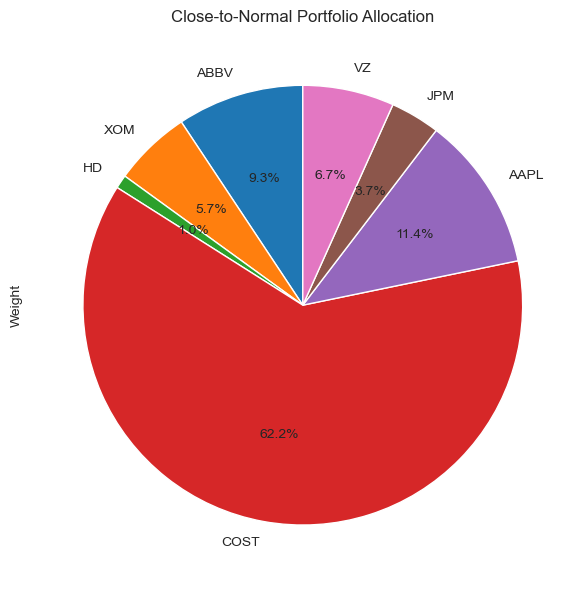

************************************************************************************************************************
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.1704 for period 1
2022-08-19 00:00:00 2022-12-27 00:00:00
→ No statistically significant evidence against normality.


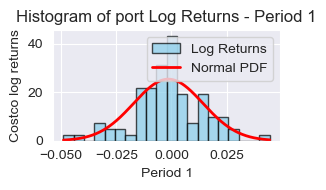

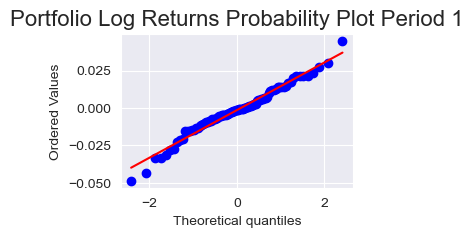

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0001 for period 2
2022-12-28 00:00:00 2023-05-08 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.


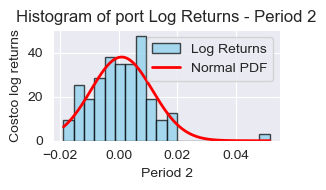

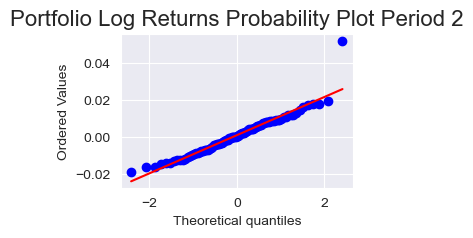

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0127 for period 3
2023-05-09 00:00:00 2023-09-15 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.


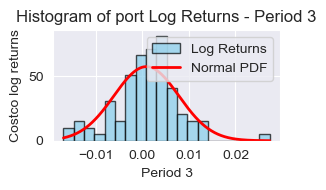

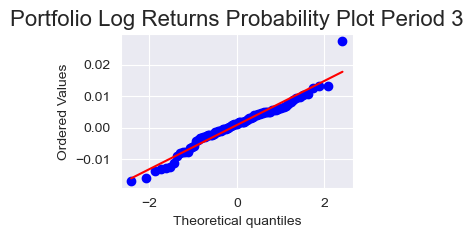

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.2214 for period 4
2023-09-18 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.


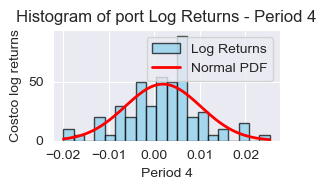

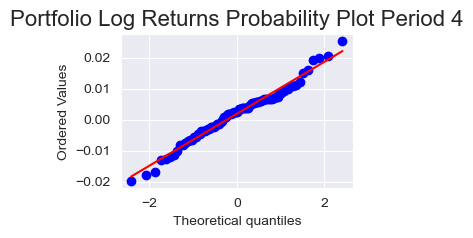

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0000 for period 5
2024-01-26 00:00:00 2024-06-04 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.


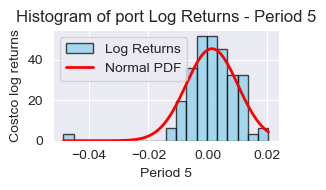

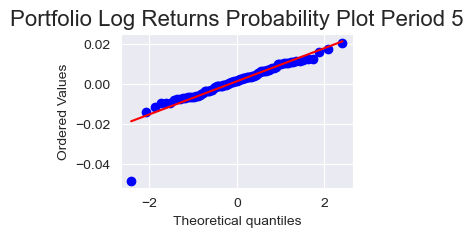

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0474 for period 6
2024-06-05 00:00:00 2024-10-11 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.


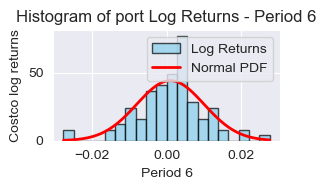

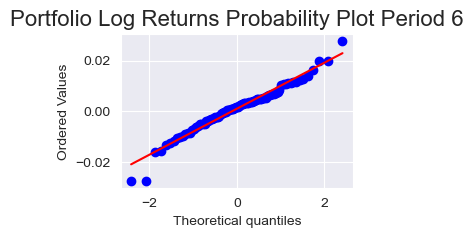

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0970 for period 7
2024-10-14 00:00:00 2025-02-24 00:00:00
→ No statistically significant evidence against normality.


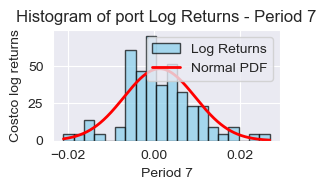

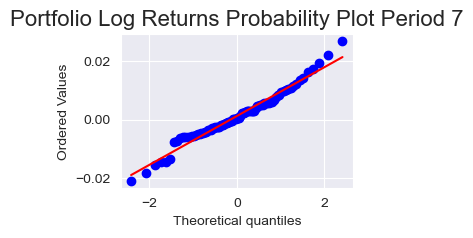

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0001 for period 8
2025-02-25 00:00:00 2025-07-03 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.


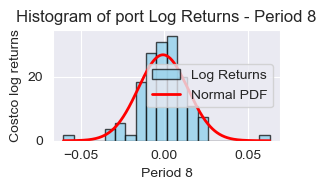

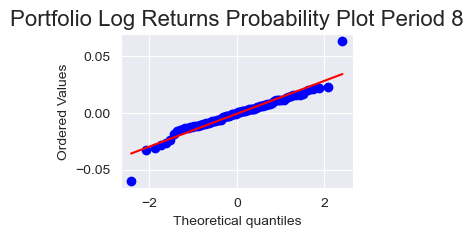

In [379]:
#Attempting problem 3
tickers = ['ABBV', 'XOM', 'HD', 'COST', 'AAPL','JPM','VZ']
portfolio_strat_date = find_earliest_trading_window_ending_today(required_days=720, calendar_name='NYSE', start_search='2010-01-01')
portfolio_end_date = dt.datetime.today()
stock = yf.download(tickers, start = portfolio_strat_date[0], end =portfolio_end_date)
splited_data_ninety = split_dataframe_by_days(stock, chunk_size_days=90)

# Number of assets
n_assets = len(tickers)

# Define an initial guess for asset weights (e.g., equal weights)
initial_weights = np.array([1/n_assets] * n_assets)

# Define weight constraints
#Sum of weights equals 1 
#Allocate at least 1% of capital into each index in stock_symbols
#Do not allocate more than 90% of capital into each index in stock_symbol
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.01},
              {'type': 'ineq', 'fun': lambda weights: .9-max(weights)})

# Define the objective function to find optimal weights for normality of our portfolio using shapiro-wilk test
def portfolio_normality(weights):
    sum_p_values = 0
    for i in range(len(splited_data_ninety)):
        returns = splited_data_ninety[i]['Close']/splited_data_ninety[i]['Close'].shift(1)
        logreturns = weights[0]*np.log(returns.dropna())['ABBV'].values+weights[1]*np.log(returns.dropna())['XOM'].values+weights[2]*np.log(returns.dropna())['HD'].values+weights[3]*np.log(returns.dropna())['COST'].values+weights[4]*np.log(returns.dropna())['AAPL'].values+weights[5]*np.log(returns.dropna())['JPM'].values+weights[6]*np.log(returns.dropna())['VZ'].values
        sum_p_values += stats.shapiro(logreturns)[1]
    
    return -1*sum_p_values
        
        
        
        
# Run the optimization to find the optimal weights
result = minimize(portfolio_normality, initial_weights, constraints=constraints)

# Optimal asset weights
optimal_weights = result.x

# Print the optimal weights and expected returns
print('Optimal Asset Weights to attain normality:')
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

low_weight_table = pd.Series(optimal_weights, index=tickers, name='Weight')
fig, ax = plt.subplots(figsize=(14, 6))
low_weight_table.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90)
ax.set_title("Close-to-Normal Portfolio Allocation")
plt.tight_layout()
plt.show()

print('************'*10)

for i in range(len(splited_data_ninety)):
    returns = splited_data_ninety[i]['Close']/splited_data_ninety[i]['Close'].shift(1)
    logreturns = optimal_weights[0]*np.log(returns.dropna())['ABBV'].values+optimal_weights[1]*np.log(returns.dropna())['XOM'].values+optimal_weights[2]*np.log(returns.dropna())['HD'].values+optimal_weights[3]*np.log(returns.dropna())['COST'].values+optimal_weights[4]*np.log(returns.dropna())['AAPL'].values+optimal_weights[5]*np.log(returns.dropna())['JPM'].values+optimal_weights[6]*np.log(returns.dropna())['VZ'].values
    p_value = stats.shapiro(logreturns)[1]
    print(f"portfolio log return distribution: Shapiro-Wilk’s test p-value = {p_value:.4f} for period {i+1}")
    print(splited_data_ninety[i].index.min(),splited_data_ninety[i].index.max())
    if p_value < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
     # Assume COST_logreturns is a list or 1D array of log returns
    mean = np.mean(logreturns)
    std = np.std(logreturns)

    # Create histogram
    plt.figure(figsize=(3, 2))  # small size

    count, bins, ignored = plt.hist(logreturns, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Log Returns')

    # Plot normal distribution curve
    x = np.linspace(min(logreturns), max(logreturns), 1000)
    plt.plot(x, norm.pdf(x, mean, std), 'r-', lw=2, label='Normal PDF')

    # Labels and title
    plt.xlabel('Period '+ str(i+1))
    plt.ylabel('Costco log returns')
    plt.title('Histogram of port Log Returns - Period '+ str(i+1))
    plt.legend()

    plt.tight_layout()
    plt.show()
    
    # Create a grid
    fig, axis = plt.subplots(figsize=(3, 2))

    # Plot COST log returns
    stats.probplot(logreturns, dist="norm", plot=axis)
    axis.set_title("Portfolio Log Returns Probability Plot Period "+ str(i+1), fontsize=16)
    axis.grid(True)


    plt.show()
    

## Remark

Here we found optimal weights for our portfolio by maximaized the sum of all three p values gotten from our tests to essentially get a more normal-like portfolio. The weights heavily favor Costco which may point towards it being the most normal out of all in the periods I considered. So some further testing of its skeness, kurtosis in addition to previous results along with the same tests for other tickers in this portfolio might be a good next step to test this observation    

Below we'll look at sixty-day periods: 
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.6086 for period 1
2022-08-19 00:00:00 2022-11-11 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.4765 for period 1
2022-08-19 00:00:00 2022-11-11 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.8836 for period 1
2022-08-19 00:00:00 2022-11-11 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************


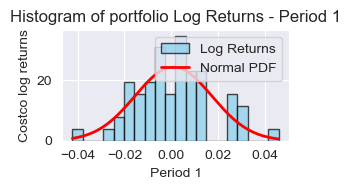

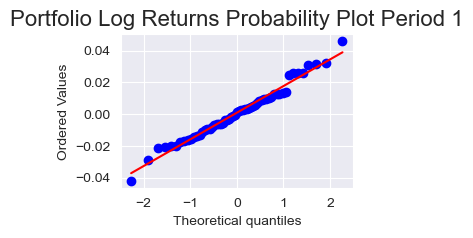

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.3702 for period 2
2022-11-14 00:00:00 2023-02-09 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.7008 for period 2
2022-11-14 00:00:00 2023-02-09 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.9103 for period 2
2022-11-14 00:00:00 2023-02-09 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************


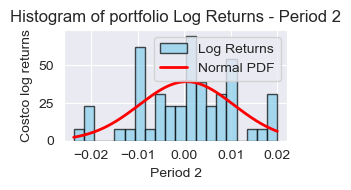

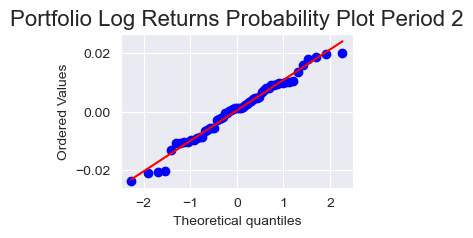

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.3594 for period 3
2023-02-10 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.5067 for period 3
2023-02-10 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.9205 for period 3
2023-02-10 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************


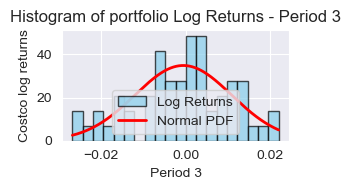

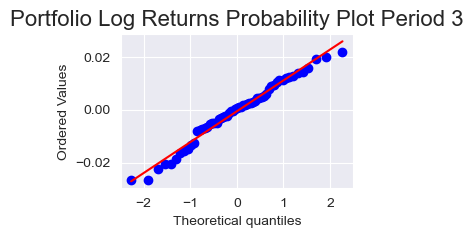

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.7628 for period 4
2023-05-09 00:00:00 2023-08-03 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.9133 for period 4
2023-05-09 00:00:00 2023-08-03 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.7710 for period 4
2023-05-09 00:00:00 2023-08-03 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************


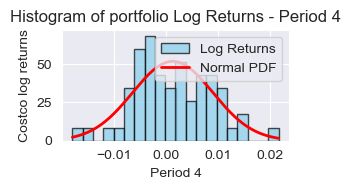

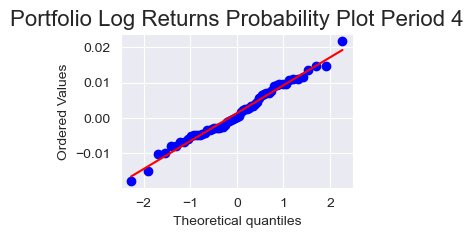

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.7646 for period 5
2023-08-04 00:00:00 2023-10-27 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.9043 for period 5
2023-08-04 00:00:00 2023-10-27 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.9157 for period 5
2023-08-04 00:00:00 2023-10-27 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************


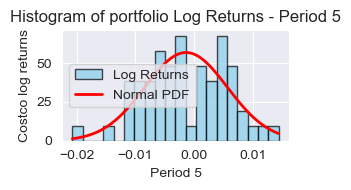

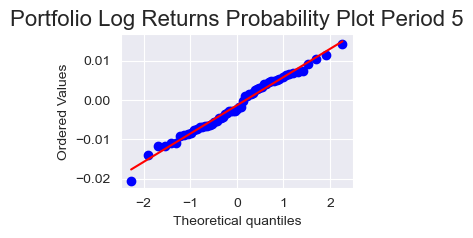

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.1000 for period 6
2023-10-30 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0496 for period 6
2023-10-30 00:00:00 2024-01-25 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.5827 for period 6
2023-10-30 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0318 for period 7
2024-01-26 00:00:00 2024-04-22 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0006 for period 7
2024-01-26 00:00:00 2024-04-22 00:00

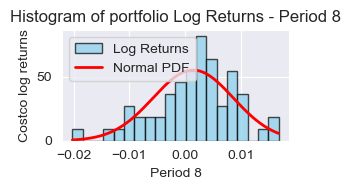

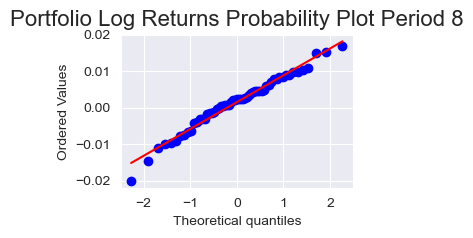

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.5396 for period 9
2024-07-19 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.2832 for period 9
2024-07-19 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.8810 for period 9
2024-07-19 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************


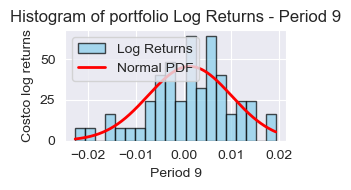

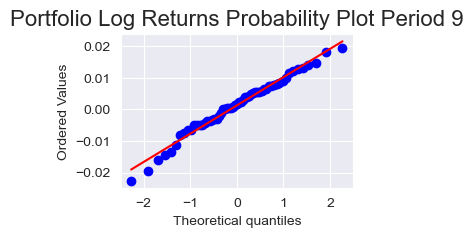

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0004 for period 10
2024-10-14 00:00:00 2025-01-08 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0001 for period 10
2024-10-14 00:00:00 2025-01-08 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.3941 for period 10
2024-10-14 00:00:00 2025-01-08 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0000 for period 11
2025-01-10 00:00:00 2025-04-07 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0000 for period 11
2025-01-10

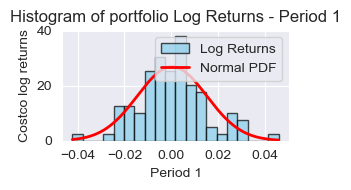

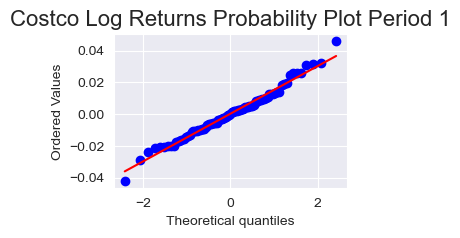

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.1474 for period 2
2022-12-28 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.2456 for period 2
2022-12-28 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.6798 for period 2
2022-12-28 00:00:00 2023-05-08 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************


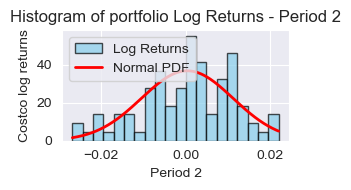

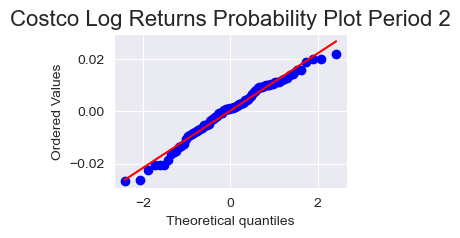

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.9161 for period 3
2023-05-09 00:00:00 2023-09-15 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.8842 for period 3
2023-05-09 00:00:00 2023-09-15 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.7532 for period 3
2023-05-09 00:00:00 2023-09-15 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************


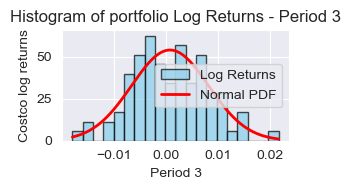

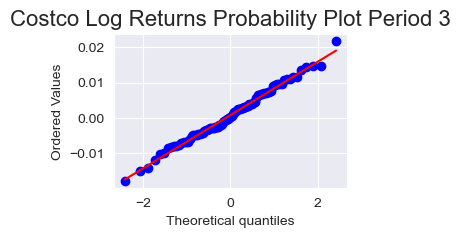

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.7859 for period 4
2023-09-18 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.4451 for period 4
2023-09-18 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.9852 for period 4
2023-09-18 00:00:00 2024-01-25 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************


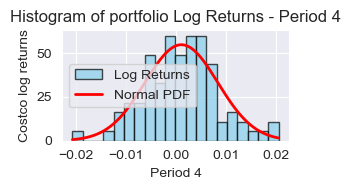

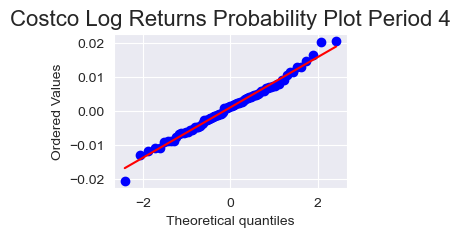

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0717 for period 5
2024-01-26 00:00:00 2024-06-04 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0065 for period 5
2024-01-26 00:00:00 2024-06-04 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.9831 for period 5
2024-01-26 00:00:00 2024-06-04 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.2034 for period 6
2024-06-05 00:00:00 2024-10-11 00:00:00
→ No statistically significant evidence against normality.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0712 for period 6
2024-06-05 00:00:00 2024-10-11 00:00:00
→ No statisticall

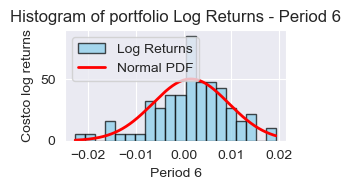

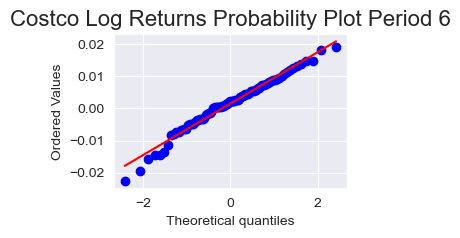

portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0033 for period 7
2024-10-14 00:00:00 2025-02-24 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0006 for period 7
2024-10-14 00:00:00 2025-02-24 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.6494 for period 7
2024-10-14 00:00:00 2025-02-24 00:00:00
→ No statistically significant evidence against normality.
****************************************************************************************************
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0000 for period 8
2025-02-25 00:00:00 2025-07-03 00:00:00
→ Statistically significant evidence that the data is NOT normally distributed.
portfolio log return distribution: Shapiro-Wilk’s test p-value = 0.0000 for period 8
2025-02-25 00:0

In [381]:
#attempting problem 4
#the weights are found when I ran the code so given the change in the dates when it will be ran in the future they might differ
low_risk_weights = [0.0300,0.1960,0.2085,0.0859,0.0744,0.3183,0.0870]



#we'll only look at 60 and 90 day periods as we saw 30 days is very small for this analysis

num_normal_days = 0 #num of days that all three test don't reject normality

print("Below we'll look at sixty-day periods: ")
splited_data_sixty = split_dataframe_by_days(stock, chunk_size_days=60)
for i in range(len(splited_data_sixty)):
    sixty_returns = splited_data_sixty[i]['Close']/splited_data_sixty[i]['Close'].shift(1)
    sixty_logreturns = low_risk_weights[0]*np.log(sixty_returns.dropna())['ABBV'].values+low_risk_weights[1]*np.log(sixty_returns.dropna())['XOM'].values+low_risk_weights[2]*np.log(sixty_returns.dropna())['HD'].values+low_risk_weights[3]*np.log(sixty_returns.dropna())['COST'].values+low_risk_weights[4]*np.log(sixty_returns.dropna())['AAPL'].values+low_risk_weights[5]*np.log(sixty_returns.dropna())['JPM'].values+low_risk_weights[6]*np.log(sixty_returns.dropna())['VZ'].values
    pearson_p_cost=stats.normaltest(sixty_logreturns)[1]
    shapiro_p_cost = stats.shapiro(sixty_logreturns)[1]
    kolmogorov_p_cost = stats.kstest(sixty_logreturns, 'norm', args=(sixty_logreturns.mean(), sixty_logreturns.std()))[1]
    
    print(f"portfolio log return distribution: Shapiro-Wilk’s test p-value = {shapiro_p_cost:.4f} for period {i+1}")
    print(splited_data_sixty[i].index.min(),splited_data_sixty[i].index.max())
    if shapiro_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
        
    print(f"portfolio log return distribution: Shapiro-Wilk’s test p-value = {pearson_p_cost:.4f} for period {i+1}")
    print(splited_data_sixty[i].index.min(),splited_data_sixty[i].index.max())
    if pearson_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
        
    print(f"portfolio log return distribution: Shapiro-Wilk’s test p-value = {kolmogorov_p_cost:.4f} for period {i+1}")
    print(splited_data_sixty[i].index.min(),splited_data_sixty[i].index.max())
    if kolmogorov_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
    print('**********'*10)
    if  shapiro_p_cost >= 0.05 and pearson_p_cost >= 0.05 and kolmogorov_p_cost >= 0.05:
        num_normal_days +=1
        
        mean = np.mean(sixty_logreturns)
        std = np.std(sixty_logreturns)

        # Create histogram
        plt.figure(figsize=(3, 2))  # small size

        count, bins, ignored = plt.hist(sixty_logreturns, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Log Returns')

        # Plot normal distribution curve
        x = np.linspace(min(sixty_logreturns), max(sixty_logreturns), 1000)
        plt.plot(x, norm.pdf(x, mean, std), 'r-', lw=2, label='Normal PDF')

        # Labels and title
        plt.xlabel('Period '+ str(i+1))
        plt.ylabel('Costco log returns')
        plt.title('Histogram of portfolio Log Returns - Period '+ str(i+1))
        plt.legend()

        plt.tight_layout()
        plt.show()
        
        # Create a grid
        fig, axis = plt.subplots(figsize=(3, 2))

        # Plot COST log returns
        stats.probplot(sixty_logreturns, dist="norm", plot=axis)
        axis.set_title("Portfolio Log Returns Probability Plot Period "+ str(i+1), fontsize=16)
        axis.grid(True)


        plt.show()
        

print("number of periods that all three test don't reject normality is "+str(num_normal_days))
print('--------------------'*10)
num_normal_days = 0 


print("Below we'll look at ninety-day periods: ")
splited_data_ninety = split_dataframe_by_days(stock, chunk_size_days=90)
for i in range(len(splited_data_ninety)):
    ninety_returns = splited_data_ninety[i]['Close']/splited_data_ninety[i]['Close'].shift(1)
    ninety_logreturns = low_risk_weights[0]*np.log(ninety_returns.dropna())['ABBV'].values+low_risk_weights[1]*np.log(ninety_returns.dropna())['XOM'].values+low_risk_weights[2]*np.log(ninety_returns.dropna())['HD'].values+low_risk_weights[3]*np.log(ninety_returns.dropna())['COST'].values+low_risk_weights[4]*np.log(ninety_returns.dropna())['AAPL'].values+low_risk_weights[5]*np.log(ninety_returns.dropna())['JPM'].values+low_risk_weights[6]*np.log(ninety_returns.dropna())['VZ'].values
    pearson_p_cost=stats.normaltest(ninety_logreturns)[1]
    shapiro_p_cost = stats.shapiro(ninety_logreturns)[1]
    kolmogorov_p_cost = stats.kstest(ninety_logreturns, 'norm', args=(ninety_logreturns.mean(), ninety_logreturns.std()))[1]
    
    print(f"portfolio log return distribution: Shapiro-Wilk’s test p-value = {shapiro_p_cost:.4f} for period {i+1}")
    print(splited_data_ninety[i].index.min(),splited_data_ninety[i].index.max())
    if shapiro_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
        
    print(f"portfolio log return distribution: Shapiro-Wilk’s test p-value = {pearson_p_cost:.4f} for period {i+1}")
    print(splited_data_ninety[i].index.min(),splited_data_ninety[i].index.max())
    if pearson_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
        
    print(f"portfolio log return distribution: Shapiro-Wilk’s test p-value = {kolmogorov_p_cost:.4f} for period {i+1}")
    print(splited_data_ninety[i].index.min(),splited_data_ninety[i].index.max())
    if kolmogorov_p_cost < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
    
        print("→ No statistically significant evidence against normality.")
    print('**********'*10)
    if  shapiro_p_cost >= 0.05 and pearson_p_cost >= 0.05 and kolmogorov_p_cost >= 0.05:
        num_normal_days +=1 
        
        mean = np.mean(ninety_logreturns)
        std = np.std(ninety_logreturns)

        # Create histogram
        plt.figure(figsize=(3, 2))  # small size

        count, bins, ignored = plt.hist(ninety_logreturns, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Log Returns')

        # Plot normal distribution curve
        x = np.linspace(min(ninety_logreturns), max(ninety_logreturns), 1000)
        plt.plot(x, norm.pdf(x, mean, std), 'r-', lw=2, label='Normal PDF')

        # Labels and title
        plt.xlabel('Period '+ str(i+1))
        plt.ylabel('Costco log returns')
        plt.title('Histogram of portfolio Log Returns - Period '+ str(i+1))
        plt.legend()

        plt.tight_layout()
        plt.show()
        
        # Create a grid
        fig, axis = plt.subplots(figsize=(3, 2))

        # Plot COST log returns
        stats.probplot(ninety_logreturns, dist="norm", plot=axis)
        axis.set_title("Costco Log Returns Probability Plot Period "+ str(i+1), fontsize=16)
        axis.grid(True)


        plt.show()

print("number of periods that all three test don't reject normality is "+str(num_normal_days))   



## Takeaways

After all the above testing, we see that for long periods of time it's close to impossible to have a stock that follows a normal distribution closely as expected. We also see that for short periods of time like 30-day periods although our tests might return values that fall within the region where it signals the potential for being normal, the Q-Q plot and our histograms show that it almost always is not the case. In the sixty and ninety day periods we were able to get more normal-like behavior especially when we removed outliers in our data. So, it's fair to say generally around the 3-6 months is when we can expect to see more normal-like behavior and for more than one year it's exremely unlikely.